In [1]:
import numpy as np

from gym_pybullet_drones.utils.Logger import Logger
from gym_pybullet_drones.envs.single_agent_rl.HoverAviary import HoverAviary
from gym_pybullet_drones.utils.utils import sync, str2bool

pybullet build time: Nov 28 2023 23:45:17


In [2]:
import gymnasium as gym
env = gym.make('hover-aviary-v0')

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000


/home/mht/anaconda3/envs/drones/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [32]:
env.observation_space
# env.INIT_RPYS

Box(-1.0, 1.0, (16,), float32)

In [11]:
env.MAX_RPM

21702.64377525105

# First-order system

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
class tf(object):
    def __init__(self, init_state = 0.):
        self.time_constant = 0.15
        self.state = init_state
        self.dt = 1 / 240
        self.factor = self.dt / self.time_constant
        
    def step_response(self):
        traj = []
        input = 1.
        for i in range(240):
            self.state = self.factor*(input - self.state) + self.state
            traj.append(self.state)
        self.traj = traj

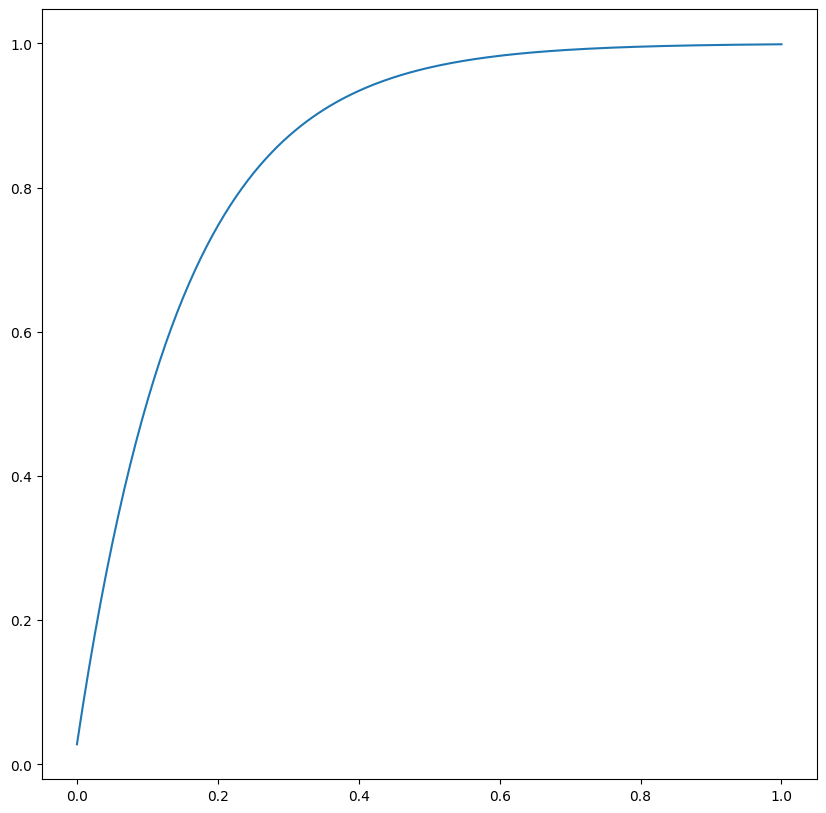

In [18]:
t = tf()
t.step_response()
plt.figure(figsize=[10, 10])
plt.plot(np.linspace(0, 1, 240), t.traj)

### Try deque

In [76]:
from collections import deque
a = deque(maxlen=10)
a

deque([], maxlen=10)

In [86]:
for i in range(10):
    a.append(i)

a.po

In [79]:
a.pop()

array([2, 2, 2])

In [92]:
a[9]

IndexError: deque index out of range

In [75]:
np.array(a)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [2, 2, 2]])